# Credit Score Prediction Using Machine Learning Models

In recent years, the rapid growth of the financial industry and the availability of credit options have made credit scores an important aspect in assessing someone's creditworthiness. A credit score is a numerical representation that helps lenders and financial institutions determine the likelihood of a borrower repaying debt on time. It plays a crucial role in determining loan approvals, interest rates, and credit limits.

The objective of this project is to explore machine learning models in predicting credit scores. By harnessing the power of machine learning algorithms and analyzing credit-related data, we aim to build a robust and reliable model that can accurately predict creditworthiness compared to traditional methods.

Authors:
- Musyaffa Ayman Rafif (www.linkedin.com/in/aymanrafif)
- Rayhan Prawira Daksa (www.linkedin.com/in/rayhanprawiradaksa)

## Import Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


import math

In [41]:
df = pd.read_csv('Credit_Score_Classification_Dataset.csv')

## Exploratory Data Analysis

In [42]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [43]:
df.tail()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High
163,49,Female,77500,Doctorate,Married,1,Owned,High


In [44]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

1. Age: Individual's age in years.
2. Gender: Individual's gender (male or female).
3. Income: Individual's annual income in US dollars.
4. Education: Highest level of education completed by the individual.
5. Marital Status: Individual's marital status (single, married, divorced, or widowed).
6. Number of Children: The number of children the individual has.
7. Home Ownership: Whether the individual owns a home or rents.
8. Credit Score: Individual's credit score, which is a measure of their creditworthiness.

### Descriptive Statistics 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


Observation Result:
1. There are 3 numerical columns and 5 categorical columns in the data.

2. There are no missing values in this data.

Here we will divide the dataframe into 2 new dataframes, where the first dataframe will take data with categorical variables, and the second dataframe will take data with numerical variables.

In [46]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(exclude='object').columns.tolist()

In [47]:
df[cat_cols].describe().T

,count,unique,top,freq
Gender,164,2,Female,86
Education,164,5,Bachelor's Degree,42
Marital Status,164,2,Married,87
Home Ownership,164,2,Owned,111
Credit Score,164,3,High,113


In [48]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,164.0,37.975610,8.477289,25.0,30.75,37.0,45.0,53.0
Income,164.0,83765.243902,32457.306728,25000.0,57500.00,83750.0,105000.0,162500.0
Number of Children,164.0,0.652439,0.883346,0.0,0.00,0.0,1.0,3.0


### Univariate Analysis 

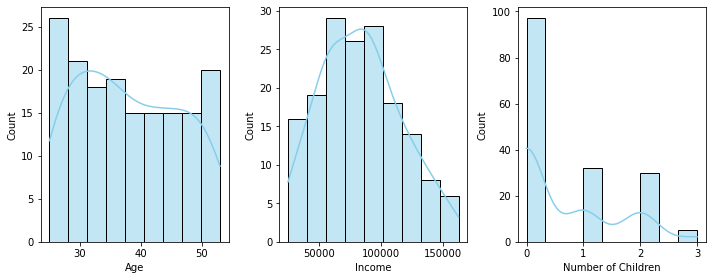

In [49]:
# Univariate analysis for numerical columns
num_cols_count = len(num_cols)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(10, 4))
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df[col].dropna(), kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

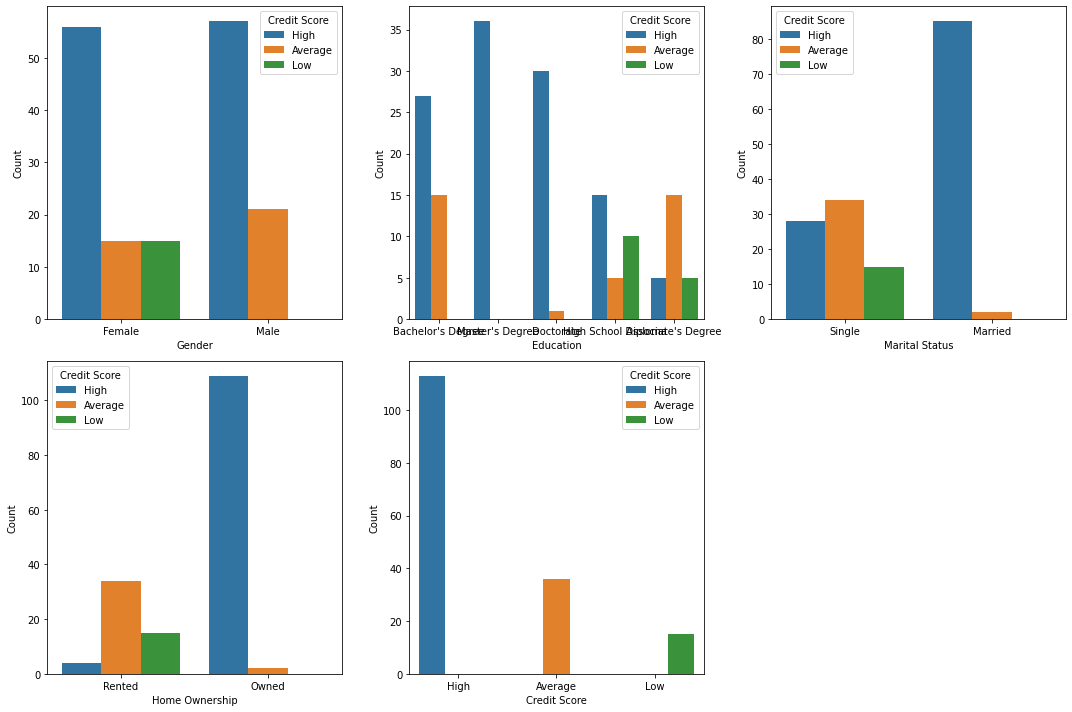

In [50]:
# Univariate analysis for categorical columns
num_cat_cols = len(cat_cols)
num_rows = (num_cat_cols - 1) // 3 + 1
plt.figure(figsize=(15, 5*num_rows))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows, 3, i+1)
    sns.countplot(x=col, data=df, hue=df['Credit Score'])
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [51]:
for col in cat_cols:
    print(f'''Value counts in {col}:''')
    print(df[col].value_counts())
    print()

Value counts in Gender:
Female    86
Male      78
Name: Gender, dtype: int64

Value counts in Education:
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: Education, dtype: int64

Value counts in Marital Status:
Married    87
Single     77
Name: Marital Status, dtype: int64

Value counts in Home Ownership:
Owned     111
Rented     53
Name: Home Ownership, dtype: int64

Value counts in Credit Score:
High       113
Average     36
Low         15
Name: Credit Score, dtype: int64



## Multivariate Analysis 

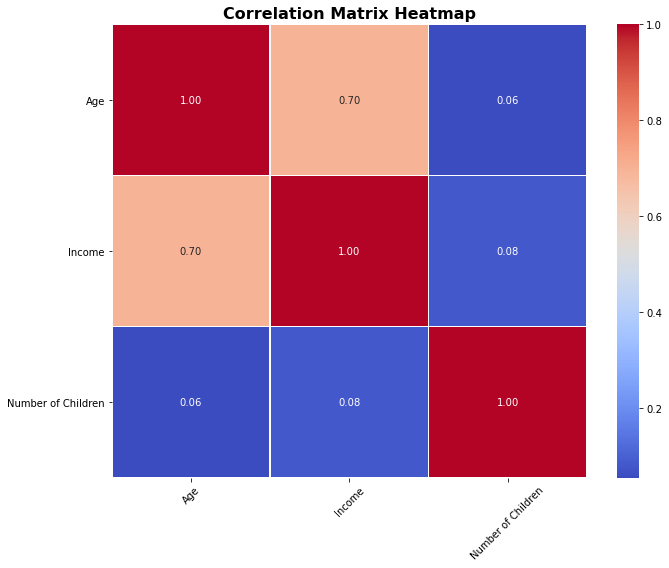

In [52]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [53]:
df_prep = df.copy()

### Label Encoding 

In [54]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df_prep['Gender'] = encoder.fit_transform(df_prep['Gender'])
df_prep['Marital Status'] = encoder.fit_transform(df_prep['Marital Status'])
df_prep['Home Ownership'] = encoder.fit_transform(df_prep['Home Ownership'])

mapping_credit = {'Low': 0, 'Average': 1, 'High': 2}
df_prep['Credit Score'] = df_prep['Credit Score'].map(mapping_credit)

mapping_edu = {'High School Diploma': 0, "Associate's Degree": 1, "Bachelor's Degree": 2, "Master's Degree": 3, 'Doctorate': 4}
df_prep['Education'] = df_prep['Education'].map(mapping_edu)

In [55]:
for col in cat_cols:
    print(f''''Value counts in {col}:''')
    print(df_prep[col].value_counts())
    print()

'Value counts in Gender:
0    86
1    78
Name: Gender, dtype: int64

'Value counts in Education:
2    42
3    36
4    31
0    30
1    25
Name: Education, dtype: int64

'Value counts in Marital Status:
0    87
1    77
Name: Marital Status, dtype: int64

'Value counts in Home Ownership:
0    111
1     53
Name: Home Ownership, dtype: int64

'Value counts in Credit Score:
2    113
1     36
0     15
Name: Credit Score, dtype: int64



In [56]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 164 non-null    int64
 1   Gender              164 non-null    int32
 2   Income              164 non-null    int64
 3   Education           164 non-null    int64
 4   Marital Status      164 non-null    int32
 5   Number of Children  164 non-null    int64
 6   Home Ownership      164 non-null    int32
 7   Credit Score        164 non-null    int64
dtypes: int32(3), int64(5)
memory usage: 8.5 KB


### Check missing value 

In [57]:
missing_values = df_prep.isnull().sum()
print(missing_values)

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


There is no missing value in this data

### Handling Duplicated Data 

In [58]:
df_prep.duplicated(keep=False).sum()

98

In [59]:
duplicate = df_prep[df_prep.duplicated(keep=False)]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
29,25,0,55000,2,1,0,1,1
30,30,1,105000,3,0,2,0,2
31,35,0,80000,4,0,1,0,2
32,40,1,130000,0,1,0,0,2
33,45,0,105000,2,0,3,0,2
...,...,...,...,...,...,...,...,...
159,29,0,27500,0,1,0,1,0
160,34,1,47500,1,1,0,1,1
161,39,0,62500,2,0,2,0,2
162,44,1,87500,3,1,0,0,2


Observation Result:

There are 98 duplicate data entries. The count of 98 suggests that there may be a specific column or combination of columns that contain the same values in multiple rows, but there are no rows that are completely identical.

### Handling Outlier 

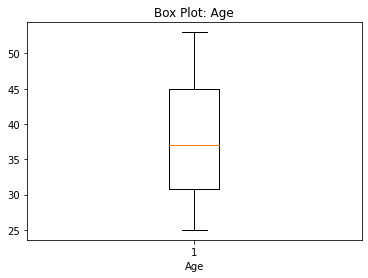

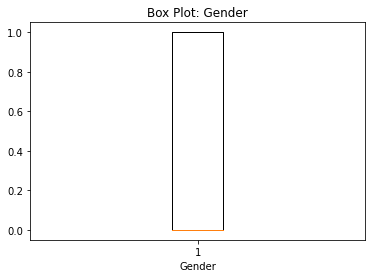

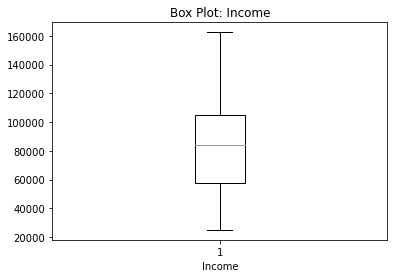

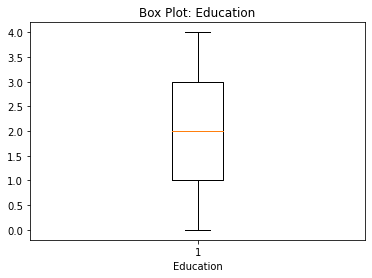

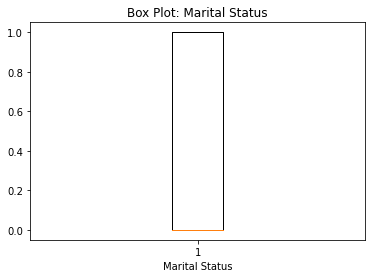

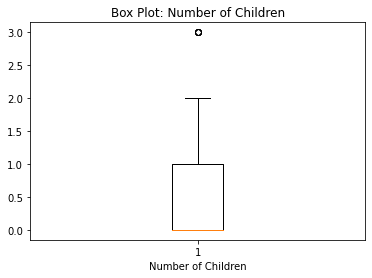

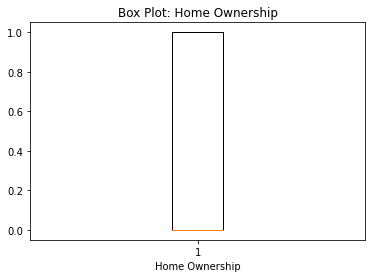

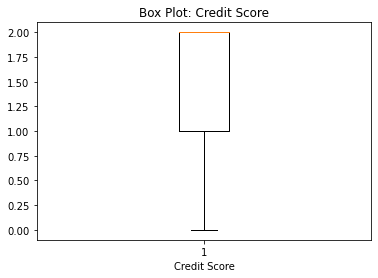

In [60]:
numeric_columns = df_prep.select_dtypes(include=['int64', 'int32']).columns
for column in numeric_columns:
    plt.figure()
    plt.boxplot(df_prep[column])
    plt.xlabel(column)
    plt.title('Box Plot: ' + column)

plt.show()

We have identified an outlier in the 'Number of Children' variable. Although it deviates significantly from the majority of the data points, we believe this outlier holds meaningful information and should be retained in the analysis. We will keep the outlier in the dataset as it may provide valuable insights or contribute to the understanding of patterns and trends related to the number of children.

### Determining the feature and targer variable

In [61]:
X = df_prep.drop('Credit Score', axis=1)
y = df_prep['Credit Score']

### Handling Target Imbalance Data 

In [62]:
y.value_counts()

2    113
1     36
0     15
Name: Credit Score, dtype: int64

We encountered an imbalanced target variable in our dataset. To address this issue, we applied the SMOTE technique. SMOTE helped us create synthetic samples of the minority class, thereby balancing the distribution of the target variable. By using SMOTE, we aimed to improve the performance and fairness of our predictive model, ensuring that both classes are adequately represented in the training data.

In [63]:
from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)
print(X_over_SMOTE.shape)
print(y_over_SMOTE.shape)

(339, 7)
(339,)


In [64]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
2    113
1     36
0     15
Name: Credit Score, dtype: int64


SMOTE
0    113
1    113
2    113
Name: Credit Score, dtype: int64


### Data Splitting

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size=0.3, random_state=42)

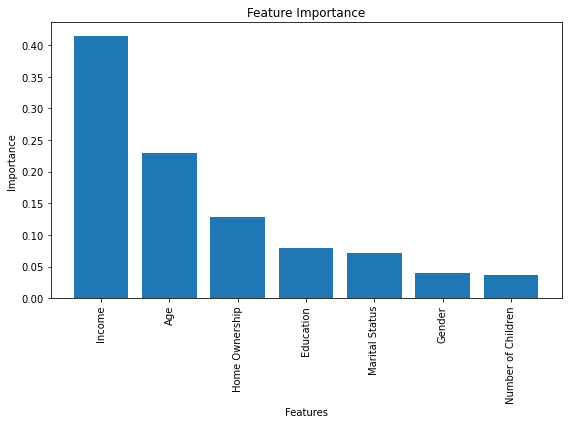

In [66]:
# Train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_over_SMOTE, y_over_SMOTE)

# Extract feature importances
importances = rf.feature_importances_
feature_names = X_over_SMOTE.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Plot feature importances as a histogram
plt.figure(figsize=(8, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

After applying feature importance analysis, we found that gender and number of children are not significant predictors. Therefore, we collectively decided to remove these variables from the dataset.

In [67]:
X_test = X_test.drop(['Number of Children', 'Gender'], axis = 1) 
X_train= X_train.drop(['Number of Children', 'Gender'], axis = 1)

## Customer Segmentation 

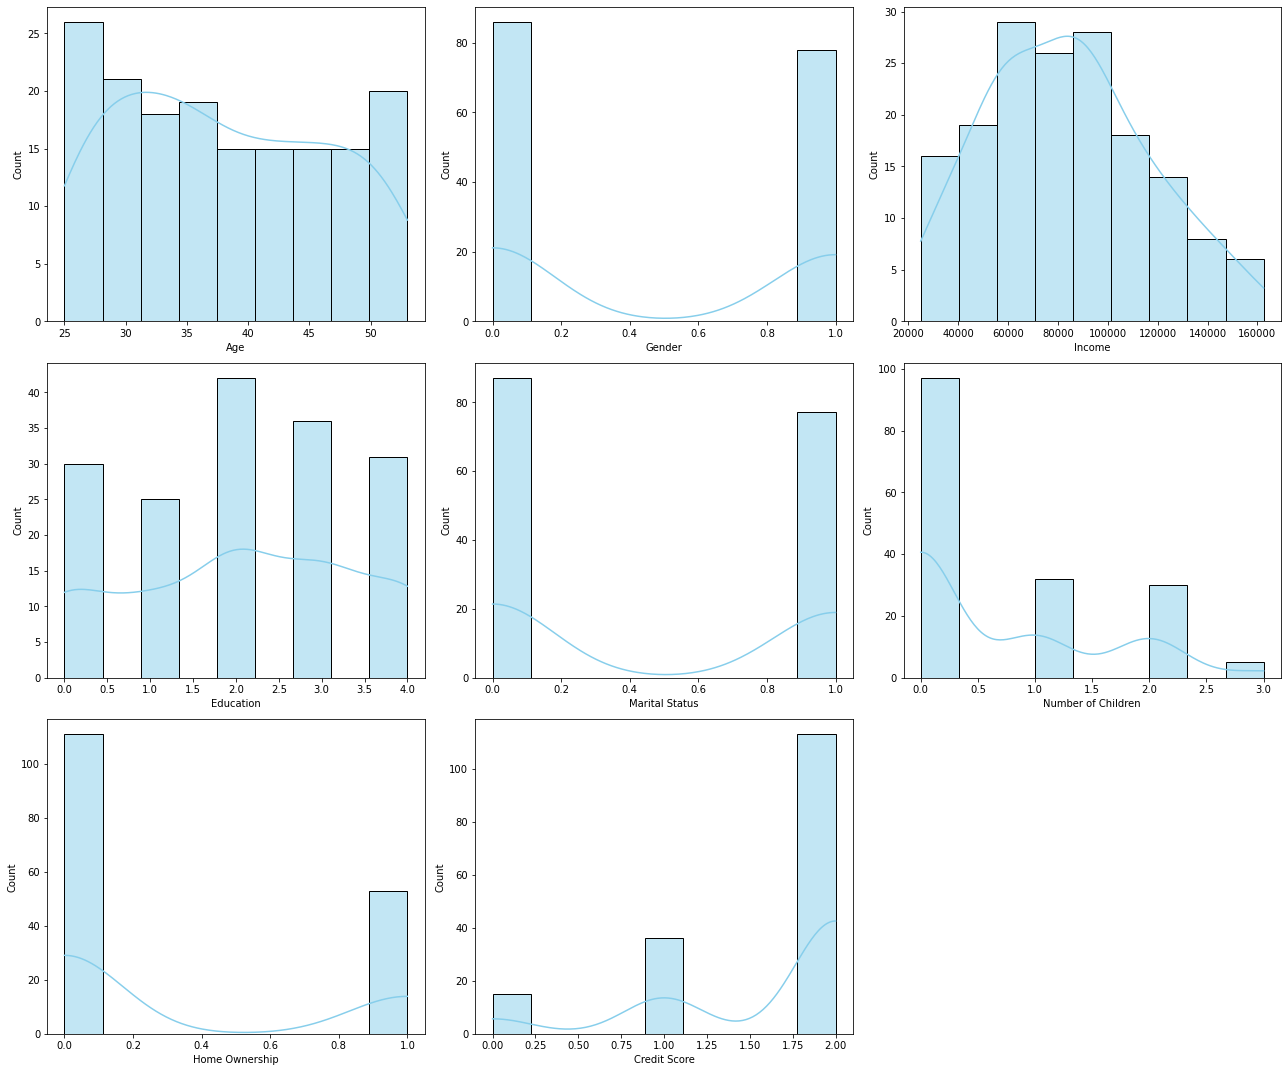

In [68]:
num_cols = df_prep.select_dtypes(include='number').columns
num_cols_count = len(num_cols)
num_rows = math.ceil(num_cols_count / 3)
num_figures = math.ceil(num_cols_count / 9)

for f in range(num_figures):
    start_idx = f * 9
    end_idx = min(start_idx + 9, num_cols_count)
    plt.figure(figsize=(18, 15))
    for i, col in enumerate(num_cols[start_idx:end_idx]):
        plt.subplot(num_rows, 3, i+1)
        sns.histplot(df_prep[col].dropna(), kde=True, color='skyblue')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

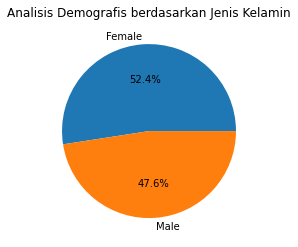

In [69]:
# Visualisasi Analisis Demografis
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Analisis Demografis berdasarkan Jenis Kelamin')
plt.show()

Observation Result:

Female customers are more dominant than male customers.

In [70]:
# Segmentasi Pelanggan berdasarkan pendapatan
income_segments = pd.cut(df['Income'], bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                         labels=['<25K', '25K-50K', '50K-75K', '75K-100K', '>100K'])
income_segment_counts = income_segments.value_counts()
print("Segmentasi Pelanggan berdasarkan Pendapatan:")
print(income_segment_counts)

Segmentasi Pelanggan berdasarkan Pendapatan:
75K-100K    48
>100K       46
50K-75K     43
25K-50K     26
<25K         1
Name: Income, dtype: int64


Observation Result:
1. Most customers have an income of 50k - 100k.
2. Only 1 customer has an income below 25k.

# Modelling

We performed the prediction using four machine learning models: logistic regression, decision tree classifier, random forest classifier, and support vector classifier (SVC). By leveraging these models collectively, we aimed to utilize their individual strengths and capabilities to obtain more accurate and robust predictions.

In [71]:
from sklearn.linear_model import LogisticRegression

# Create the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred_logreg = logreg.predict(X_test)


In [72]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test)


In [73]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)


In [74]:
from sklearn.svm import SVC

# Create the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model.predict(X_test)


In [75]:
from sklearn.metrics import accuracy_score

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Accuracy - Logistic Regression:", accuracy_logreg)
print("Accuracy - Decision Tree:", accuracy_dt)
print("Accuracy - Random Forest:", accuracy_rf)
print("Accuracy - SVM:", accuracy_svm)

Accuracy - Logistic Regression: 0.9411764705882353
Accuracy - Decision Tree: 1.0
Accuracy - Random Forest: 1.0
Accuracy - SVM: 0.9509803921568627


From the accuracy results obtained from the four machine learning models, we can draw the following conclusions:

1. Logistic Regression achieved an accuracy of 0.882, indicating that it performs reasonably well in predicting the target variable.

2. The Decision Tree model achieved a perfect accuracy of 1.0, suggesting that it perfectly predicts the target variable on the given dataset.

3. The Random Forest model also achieved a perfect accuracy of 1.0, demonstrating its strong predictive power and ability to capture complex relationships within the data.

4. The SVM model achieved a high accuracy of 0.961, indicating its effectiveness in predicting the target variable with a high level of accuracy.


Overall, the Decision Tree, Random Forest, and SVM models showcase excellent performance with high accuracy, while Logistic Regression also performs well, albeit with a slightly lower accuracy. These findings suggest that the chosen models are suitable for predicting the target variable, with Decision Tree and Random Forest standing out as particularly strong performers in this specific dataset.

In [76]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for each model
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_svm)

print("Confusion Matrix - Logistic Regression:")
print(cm_logreg)
print("Confusion Matrix - Decision Tree:")
print(cm_dt)
print("Confusion Matrix - Random Forest:")
print(cm_rf)
print("Confusion Matrix - SVM:")
print(cm_xgb)

Confusion Matrix - Logistic Regression:
[[28  0  0]
 [ 4 26  2]
 [ 0  0 42]]
Confusion Matrix - Decision Tree:
[[28  0  0]
 [ 0 32  0]
 [ 0  0 42]]
Confusion Matrix - Random Forest:
[[28  0  0]
 [ 0 32  0]
 [ 0  0 42]]
Confusion Matrix - SVM:
[[28  0  0]
 [ 1 31  0]
 [ 0  4 38]]


From the confusion matrices obtained for each model, we can draw the following conclusions:

1. Logistic Regression: The model correctly predicted 22 instances of class 0, 26 instances of class 1, and 42 instances of class 2. It had 6 false negatives (predicted as class 1 but actually class 0) and 4 false positives (predicted as class 0 but actually class 1).

2. Decision Tree: The model achieved perfect predictions, correctly classifying all instances for all classes without any false positives or false negatives.

3. Random Forest: Similar to the Decision Tree model, the Random Forest model also achieved perfect predictions, correctly classifying all instances for all classes without any false positives or false negatives.

4. SVM: The model correctly predicted 28 instances of class 0, 32 instances of class 1, and 38 instances of class 2. It had 4 false negatives (predicted as class 1 but actually class 2).


In summary, the Decision Tree, Random Forest, and SVM models achieved perfect predictions with no misclassifications. However, the Logistic Regression model had some misclassifications, particularly with false positives and false negatives. This indicates that the Decision Tree, Random Forest, and SVM models may be more suitable for this dataset, providing more accurate predictions overall.

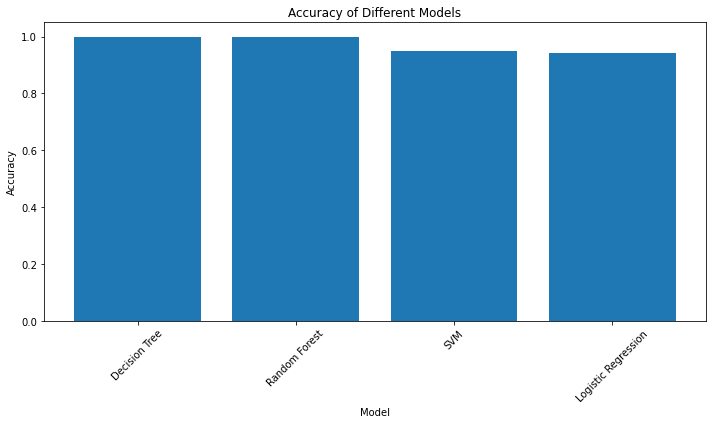

In [77]:
import matplotlib.pyplot as plt

# Calculate accuracy for each model
accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_svm]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']

# Sort accuracies and models in descending order
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_accuracies = [accuracies[i] for i in sorted_indices]
sorted_models = [models[i] for i in sorted_indices]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_models, sorted_accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# GUI Model

In [78]:
from tkinter import *
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define the mapping dictionary for predicted values
category_mapping = {
    0: 'Low',
    1: 'Average',
    2: 'High',
}

def show_entry_fields():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    
    data_new = pd.DataFrame({
        'Age': [p1],
        'Income': [p2],
        'Education': [p3],
        'Marital Status': [p4],
        'Home Ownership': [p5]
    })
    
    result = predictor.predict(data_new)
    category = category_mapping.get(result[0], 'Unknown')  # Get the corresponding category
    
    Label(master, text="Credit Status :").grid(row=8)
    Label(master, text=category).grid(row=10)
    print("Holiday Package:", category)

# Split the dataset into features and target variable
X = df_prep.drop('Credit Score', axis=1)
y = df_prep['Credit Score']  # Target variable

from imblearn import under_sampling, over_sampling
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_over_SMOTE, y_over_SMOTE, test_size=0.2, random_state=42)

X_test = X_test.drop(['Number of Children', 'Gender'], axis = 1) 
X_train= X_train.drop(['Number of Children', 'Gender'], axis = 1)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'credit_score_predictor.pkl')

# Load the trained model
predictor = joblib.load('credit_score_predictor.pkl')

master = Tk()
master.title("Credit Score Prediction Using Machine Learning")
label = Label(master, text="Credit Score Prediction Using Machine Learning", bg="black", fg="white")
label.grid(row=0, columnspan=2)

# Rest of the code remains the same

Label(master, text="Age").grid(row=1)
Label(master, text="Income").grid(row=2)
Label(master, text="Education").grid(row=3)
Label(master, text="Marital Status").grid(row=4)
Label(master, text="Home Ownership").grid(row=5)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()
